In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.xkcd()

In [2]:
df = pd.read_csv('master.csv')

In [3]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
df.shape

(27820, 12)

In [5]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [6]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
df = df.drop(['HDI for year', 'country-year'], axis=1)

In [8]:
pivot1 = pd.pivot_table(df, values='suicides_no', index='country', aggfunc=np.sum)
pivot1 = pivot1.sort_values(by='suicides_no', ascending=False)
pivot1.reset_index(inplace=True)
pivot1

,country,suicides_no
0,Russian Federation,1209742
1,United States,1034013
2,Japan,806902
3,France,329127
4,Ukraine,319950
...,...,...
96,Maldives,20
97,Antigua and Barbuda,11
98,San Marino,4
99,Saint Kitts and Nevis,0


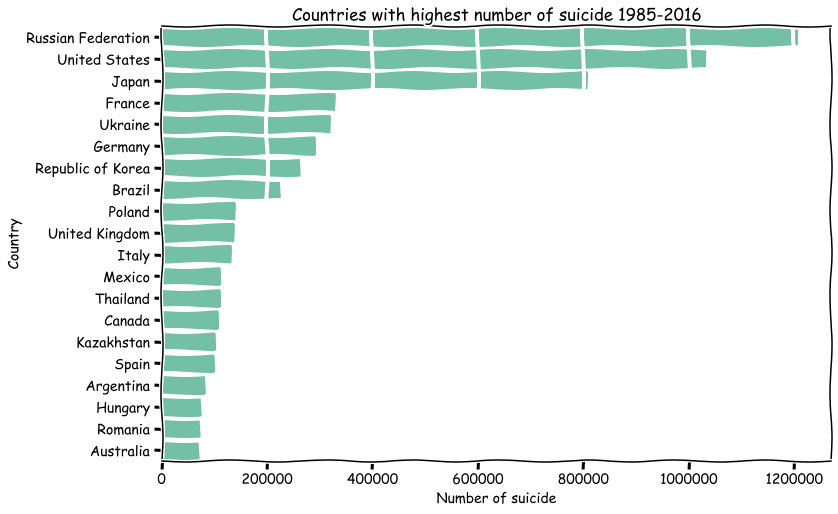

In [22]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=pivot1.suicides_no[:20], y=pivot1.country[:20], color='mediumaquamarine')
ax.set(xlabel='Number of suicide', ylabel='Country')
plt.grid(True, axis='x')
plt.title('Countries with highest number of suicide 1985-2016')
plt.show()

In [40]:
pivot2 = pd.pivot_table(df, values='suicides_no', index='year', aggfunc=np.sum)
pivot2.reset_index(inplace=True)
pivot2.head()

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244


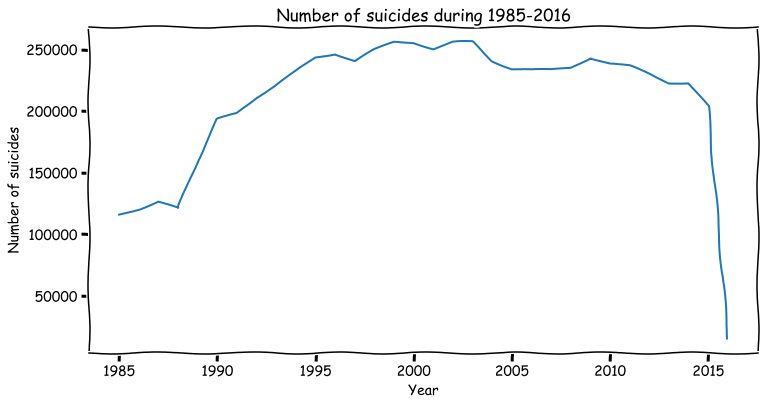

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(pivot2['year'], pivot2['suicides_no'])
plt.xlabel('Year')
plt.ylabel("Number of suicides")
plt.title('Number of suicides during 1985-2016')
plt.show()

In [62]:
pivot3 = pd.pivot_table(df, values='suicides_no', index='age', aggfunc=np.sum)
pivot3.reset_index(inplace=True)
pivot3 = pivot3.sort_values(by=['age'])
pivot3 = pivot3.reindex([3, 0, 1, 2, 4, 5])
pivot3

,age,suicides_no
3,5-14 years,52264
0,15-24 years,808542
1,25-34 years,1123912
2,35-54 years,2452141
4,55-74 years,1658443
5,75+ years,653118


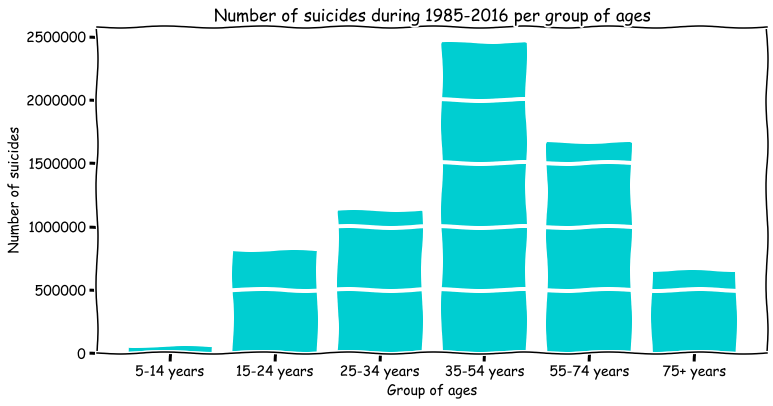

In [69]:
plt.figure(figsize=(12, 6))
plt.bar(pivot3['age'], pivot3['suicides_no'], color='darkturquoise')
plt.grid(True, axis='y')
plt.xlabel('Group of ages')
plt.ylabel('Number of suicides')
plt.title('Number of suicides during 1985-2016 per group of ages')
plt.show()

In [73]:
pivot4 = pd.pivot_table(df, values=['suicides_no', 'gdp_per_capita ($)'], index='country')
pivot4.reset_index(inplace=True)
pivot4

,country,gdp_per_capita ($),suicides_no
0,Albania,1859.045455,7.462121
1,Antigua and Barbuda,10448.185185,0.033951
2,Argentina,7914.096774,221.018817
3,Armenia,1873.919463,6.392617
4,Aruba,24221.642857,0.601190
...,...,...,...
96,United Arab Emirates,42162.000000,8.638889
97,United Kingdom,31908.354839,367.755376
98,United States,39269.612903,2779.604839
99,Uruguay,7622.071429,39.101190


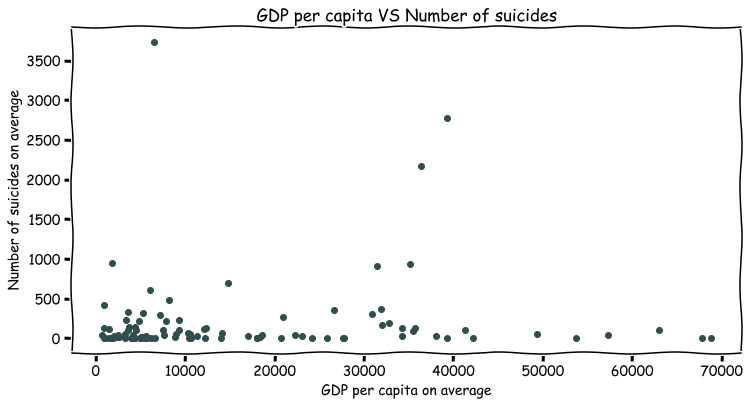

In [77]:
plt.figure(figsize=(12, 6))
plt.scatter(pivot4['gdp_per_capita ($)'], pivot4['suicides_no'], color='darkslategray')
plt.xlabel('GDP per capita on average')
plt.ylabel('Number of suicides on average')
plt.title('GDP per capita VS Number of suicides')
plt.show()

In [79]:
pivot5 = pd.pivot_table(df, values='suicides_no', index='generation', aggfunc=np.sum)
pivot5.reset_index(inplace=True)
pivot5 = pivot5.reindex([1, 5, 0, 2, 4, 3])
pivot5

,generation,suicides_no
1,G.I. Generation,510009
5,Silent,1781744
0,Boomers,2284498
2,Generation X,1532804
4,Millenials,623459
3,Generation Z,15906


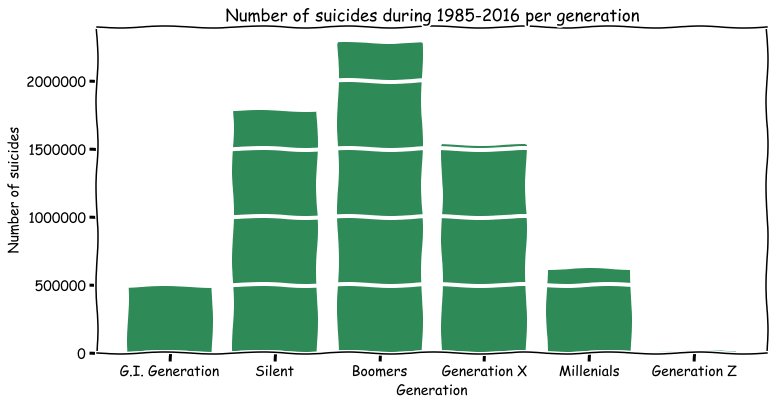

In [81]:
plt.figure(figsize=(12, 6))
plt.bar(pivot5['generation'], pivot5['suicides_no'], color='seagreen')
plt.grid(True, axis='y')
plt.xlabel('Generation')
plt.ylabel('Number of suicides')
plt.title('Number of suicides during 1985-2016 per generation')
plt.show()